In [19]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from numpy.fft import fft2,ifft2
import cv2

def calc_image_error(im1,im2):
    return npl.norm(im1-im2)**2/npl.norm(im1)**2

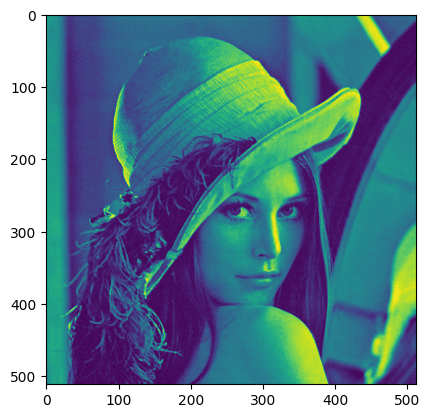

In [20]:
im = cv2.imread('lena.png')[:,:,0]
N=len(im)
plt.imshow(im)

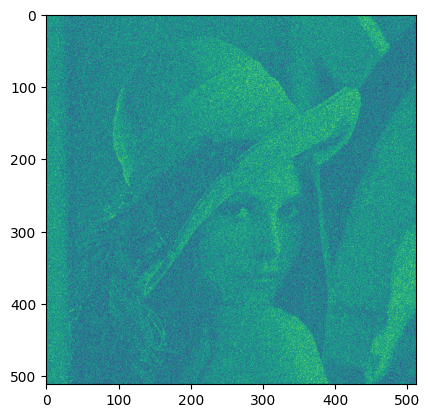

In [21]:
sigma=100
np.random.seed(0)
noise=sigma*np.random.randn(N,N)
noisy_im=im+noise
plt.imshow(noisy_im)

In [22]:
noise_level = calc_image_error(im,noisy_im)
print('Initial error level:',noise_level)

Initial error level: 0.8572556728044988


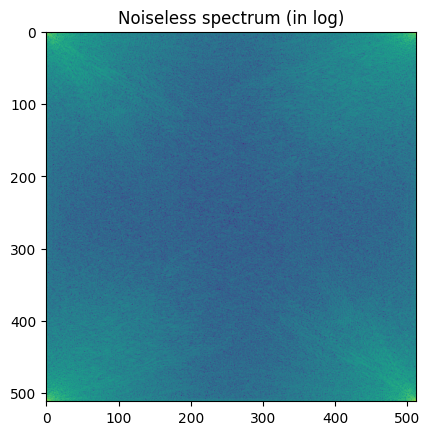

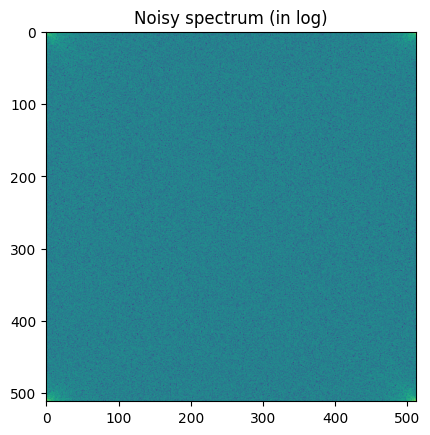

In [23]:
freq_data = fft2(im)
noisy_freq_data = fft2(noisy_im)

plt.figure()
plt.title('Noiseless spectrum (in log)')
plt.imshow(np.log(np.abs(freq_data)))

plt.figure()
plt.title('Noisy spectrum (in log)')
plt.imshow(np.log(np.abs(noisy_freq_data)))

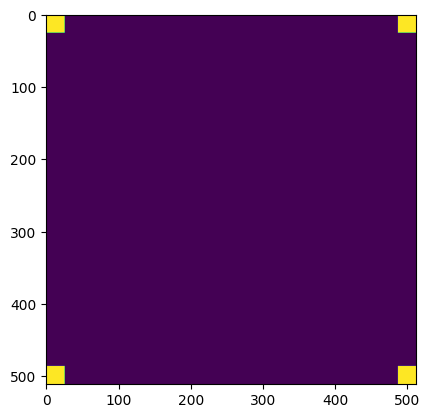

In [24]:
def low_pass_filter_2D(st,N):
    Nst=int(st*N)
    Filter=np.zeros((N,N))
    Filter[:Nst+1,:Nst+1]=1
    Filter[:Nst+1,-Nst:]=1
    Filter[-Nst:,:Nst+1]=1
    Filter[-Nst:,-Nst:]=1
    return Filter

fst=0.05
Filter = low_pass_filter_2D(fst,N)
plt.imshow(Filter)

Reconstruction error: 0.036574699464578114
Initial error level : 0.8572556728044988


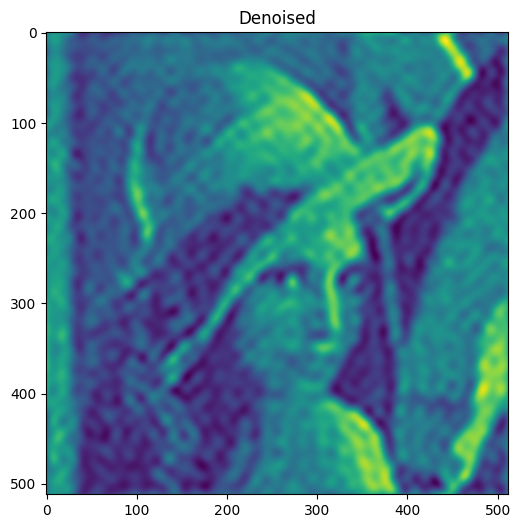

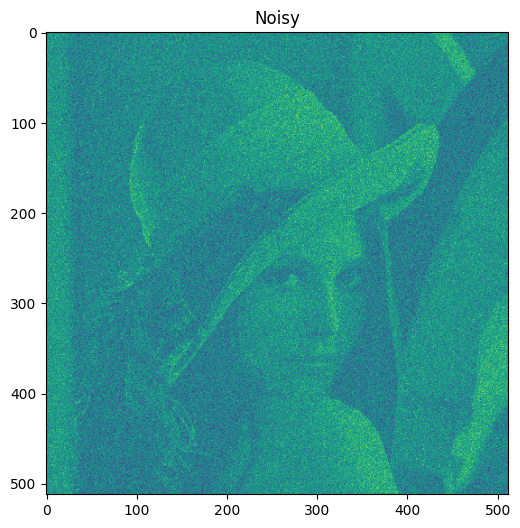

In [25]:
filtered_freq=Filter*noisy_freq_data

filtered_im = np.real(ifft2(filtered_freq))
error_level = calc_image_error(im,filtered_im)
print('Reconstruction error:',error_level)
print('Initial error level :',noise_level)

plt.figure(figsize=(6,6))
plt.title('Denoised')
plt.imshow(filtered_im)
plt.figure(figsize=(6,6))
plt.title('Noisy')
plt.imshow(noisy_im)

In [26]:
# Errors in frequency domain: Should be same as pixel domain
print('Reconstruction error:',calc_image_error(freq_data,filtered_freq))
print('Initial error level :',calc_image_error(freq_data,noisy_freq_data))

Reconstruction error: 0.03657469946457865
Initial error level : 0.8572556728044857
